# MILESTONES 2

`Rizqi Rizmayani Putri Batch 002`

## Problem Statement

Kementerian pendidikan sedang berencana untuk merevisi kurikulum dengan menambahkan kelas tambahan untuk siswa yang mempunyai nilai akhir dibawah nilai yang ditentukan. Untuk memenuhi kebutuhan tersebut, maka dibentuklah tim data analis dengan tujuan untuk memprediksi siswa yang mempunyai niai dibawah nilai yang ditentukan.

#### Streamlit Link
https://huggingface.co/spaces/rizqirizmayani/Rizqi_Rizmayani_HCK002

### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from imblearn.datasets import make_imbalance

import warnings
warnings.filterwarnings("ignore")

### LOAD DATA AND OVERVIEW

In [2]:
df = pd.read_csv('test_scores.csv')

In [3]:
df.head(2)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0


In [4]:
df.tail(2)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0
2132,ZOWMK,Urban,Public,ZBH,Standard,30.0,ZVCQ8,Male,Qualifies for reduced/free lunch,41.0,48.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [6]:
df[df.duplicated()].shape

(0, 11)

In [7]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [8]:
df.shape

(2133, 11)

In [9]:
numerical = df.describe().columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()

In [10]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
n_student,2133.0,22.796531,4.228893,14.0,20.0,22.0,27.0,31.0
pretest,2133.0,54.955931,13.563101,22.0,44.0,56.0,65.0,93.0
posttest,2133.0,67.102203,13.986789,32.0,56.0,68.0,77.0,100.0


In [11]:
for i in categorical:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

school

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64
----------
school_setting

Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64
----------
school_type

Public        1582
Non-public     551
Name: school_type, dtype: int64
----------
classroom

18K    31
ZBH    30
QA2    30
Q0E    30
YTB    30
       ..
SSP    15
KR1    15
IQN    15
JGD    14
197    14
Name: classroom, Length: 97, dtype: int64
----------
teaching_method

Standard        1373
Experimental     760
Name: teaching_method, dtype: int64
----------
student_id

2FHT3    1
P5X30    1
7NE6P    1
36YGH    1
2GDJ8    1
        ..
X01MT    1
VMAIX    1
VIVT4    1
V3J4V    1
ZVCQ8    1
Name: student_id, Length: 2133, dtype:

Berdasarkan data loading dan overview didapatkan informasi sebagai berikut:
- tidak terdapatnya missing value
- tidak terdapatnya data duplicated
- data numerikal terdiri dari kolom : n_studend, pretest dan postest
- data kategorikal terdiri dari kolom : school, school_setting, school_type, classroom, teaching_method, student_id, gender dan lunch

### DATA CLEANING

In [12]:
df_clean = df.copy()
df_clean.head(2)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0


In [13]:
column_list = ['school','classroom','student_id']
df_clean = df_clean.drop(column_list, axis=1)

In [14]:
df_clean.head(2)

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0


In [15]:
df_clean['student_n']=0
for i in df_clean.index:
  if df_clean["n_student"][i]<=20:
    df_clean["student_n"][i]= 0
  else:
    df_clean["student_n"][i]=1

In [16]:
df_clean['pre_test']=0
for i in df_clean.index:
  if df_clean["pretest"][i]<70:
    df_clean["pre_test"][i]= 1
  else:
    df_clean["pre_test"][i]=0

In [17]:
df_clean['post_test']=0
for i in df_clean.index:
  if df_clean["posttest"][i]<70:
    df_clean["post_test"][i]= 1
  else:
    df_clean["post_test"][i]=0

In [18]:
df_clean.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,student_n,pre_test,post_test
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0,0,1,0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0,0,1,0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,0,1,0
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0,0,1,0
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,0,1,0


In [19]:
column_list1 = ['n_student','pretest','posttest']
df_clean = df_clean.drop(column_list1, axis=1)

Cleaning Data:
- drop kolom school, classroom dan student_id :
1. school, dikarenakan merupakan informasi nama sekolah yang mana untuk melihat kualitas berdasarkan metode dan status sekolah sudah diwakili oleh kolom lainnya.
2. classromm, dikarenakan hanya informasi nama kelas
3. student_id, dikarenakan data merupakan unique value
- Feature engenering awal :
1. n_student, jumlah siswa dalam kelas dibuat kedalam nilai binari (<=20(0) dan >20(1))
2. pretest, nilai siswa dibuat kedalam nilai binari (<=70(1) dan >70(0))
3. posttest, nilai siswa dibuat kedalam nilai binari (<=70(1) dan >70(0))

0 = good grade dan 1 = poor grade


### EDA For Analysis

<AxesSubplot:xlabel='post_test', ylabel='count'>

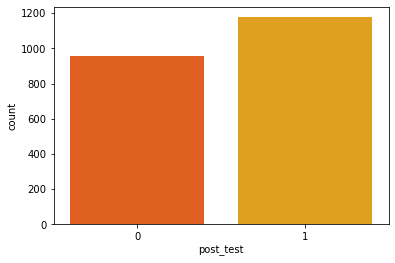

In [20]:
sns.countplot(data=df_clean,x='post_test',palette="autumn")

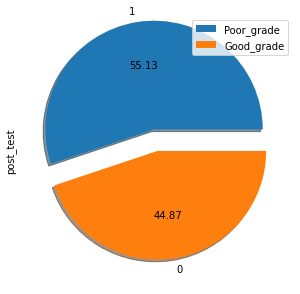

In [21]:
plt.figure(figsize = (8,5),facecolor='white')
df_clean['post_test'].value_counts().plot(kind = 'pie',explode = [0.2,0.0], shadow = True,autopct = "%.2f")
plt.legend(['Poor_grade','Good_grade'])
plt.show()

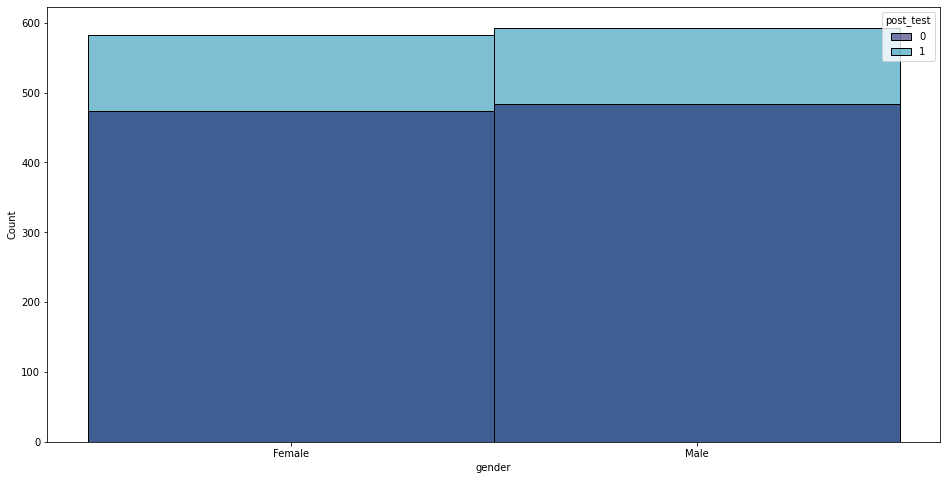

In [22]:
plt.figure(figsize=(16,8))
sns.histplot(x='gender',data=df_clean, hue='post_test',palette="ocean")
plt.show()

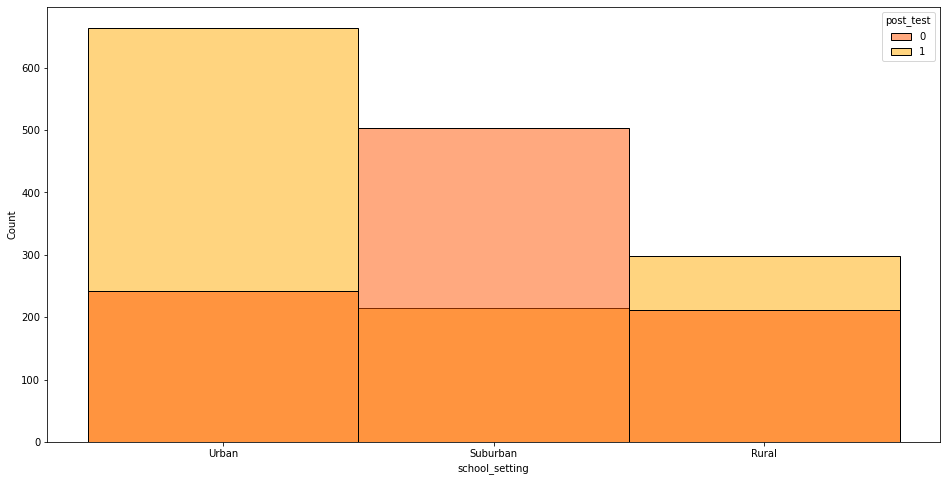

In [23]:
plt.figure(figsize=(16,8))
sns.histplot(x='school_setting',data=df_clean, hue='post_test',palette="autumn")
plt.show()

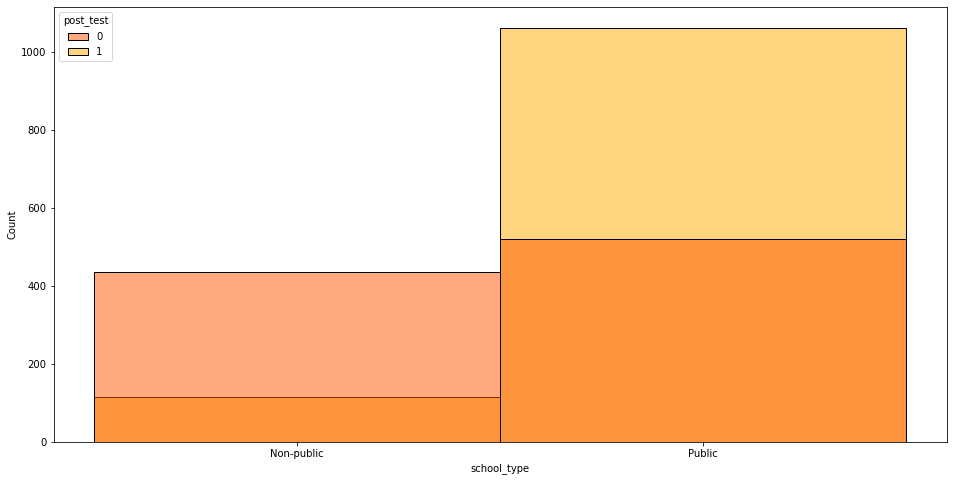

In [24]:
plt.figure(figsize=(16,8))
sns.histplot(x='school_type',data=df_clean, hue='post_test',palette="autumn")
plt.show()

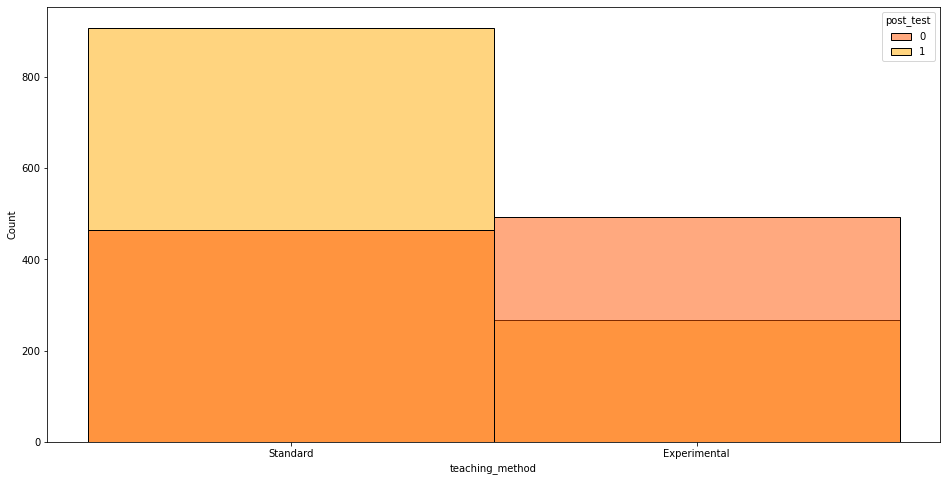

In [25]:
plt.figure(figsize=(16,8))
sns.histplot(x='teaching_method',data=df_clean, hue='post_test',palette="autumn")
plt.show()

Informasi yang didapatkan dari EDA for analysis:
- siswa dengan poor grade lebih banyak dibandingkan dengan siswa good grade, dengan persentasi good grade sebesar 44.87% dan poor grade sebesar 55.13%
- poor grade dan good grade untuk gender berimbang antar kedua kategorinya
- sekolah dengan kategori urban lebih sedikit siswa dengan nilai dibawah 70 dibanding kategori lainnya
- perbandingan antara good grade dan poor grade untuk sekolah public (sekolah negeri) seimbang antara kedua kategorinya. Sedangkan untuk sekolah non-public (sekolah swasta) lebih banyak siswa dengan nilai dibawah 70 dibandingkan siswa dengan nilai diatas 70.


#### Split data into Train, Test and Inference

In [26]:
inference = df_clean.sample(20, random_state=17)
inference

,school_setting,school_type,teaching_method,gender,lunch,student_n,pre_test,post_test
1015,Rural,Public,Standard,Female,Qualifies for reduced/free lunch,1,1,1
1308,Urban,Public,Standard,Male,Does not qualify,1,1,1
874,Urban,Non-public,Experimental,Male,Does not qualify,1,0,0
369,Suburban,Public,Experimental,Male,Does not qualify,0,1,1
1134,Rural,Public,Standard,Female,Does not qualify,0,1,1
1226,Rural,Public,Standard,Female,Does not qualify,1,1,1
1082,Rural,Public,Standard,Male,Qualifies for reduced/free lunch,1,1,1
584,Suburban,Public,Standard,Female,Qualifies for reduced/free lunch,1,1,1
1305,Urban,Public,Standard,Female,Does not qualify,1,1,1
1129,Rural,Public,Standard,Female,Does not qualify,0,1,1


In [27]:
df_clean = df_clean.drop(inference.index)

In [28]:
df_clean.shape

(2113, 8)

In [29]:
X = df_clean.drop('post_test', axis=1)
y = df_clean['post_test']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(1584, 7)
(529, 7)
(1584,)
(529,)


In [30]:
df_eda = pd.concat([X_train, y_train], axis=1)
testing = pd.concat([X_test, y_test], axis=1)

df_eda.shape

(1584, 8)

Proses pembagian data kedalam 3 dataframe, yaitu:
- data inference yang akan digunakan untuk pengujian model setelah model evaluation
- data train dengan besaran 75% dari data
- data test dengan besaran 25% dari data

Penentuan kolom target dan kolom feature yang dituliskan dengan y untuk target dan x untuk feature

### EDE For Modeling

In [31]:
df_eda.head(2)

,school_setting,school_type,teaching_method,gender,lunch,student_n,pre_test,post_test
1800,Rural,Public,Standard,Female,Does not qualify,0,1,1
1311,Urban,Public,Standard,Female,Does not qualify,1,1,1


#### Ordinal Encoding

In [32]:
setting_cat = ['Rural','Suburban','Urban']
type_cat = ['Non-public','Public']
teaching_cat = ['Experimental','Standard']
lunch_cat = ['Does not qualify', 'Qualifies for reduced/free lunch']

ord_enc = OrdinalEncoder(categories=[setting_cat, type_cat, teaching_cat, lunch_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_eda[['school_setting','school_type','teaching_method','lunch']]))

cat_ord.columns = ['school_setting_ord','school_type_ord','teaching_method_ord','lunch_ord']

#### One Hot Encoding

In [33]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_eda[['gender']]))
cat_ohe.columns = ohe_enc.get_feature_names(['gender'])

review = pd.concat([df_eda[['gender']].reset_index(drop=True), cat_ohe], axis=1)
review.head(5)

,gender,gender_Female,gender_Male
0,Female,1.0,0.0
1,Female,1.0,0.0
2,Male,0.0,1.0
3,Female,1.0,0.0
4,Female,1.0,0.0


In [34]:
train_eda = pd.concat([df_eda.reset_index(drop=True), cat_ord, cat_ohe.reset_index(drop=True)], axis=1)
train_eda.shape

(1584, 14)

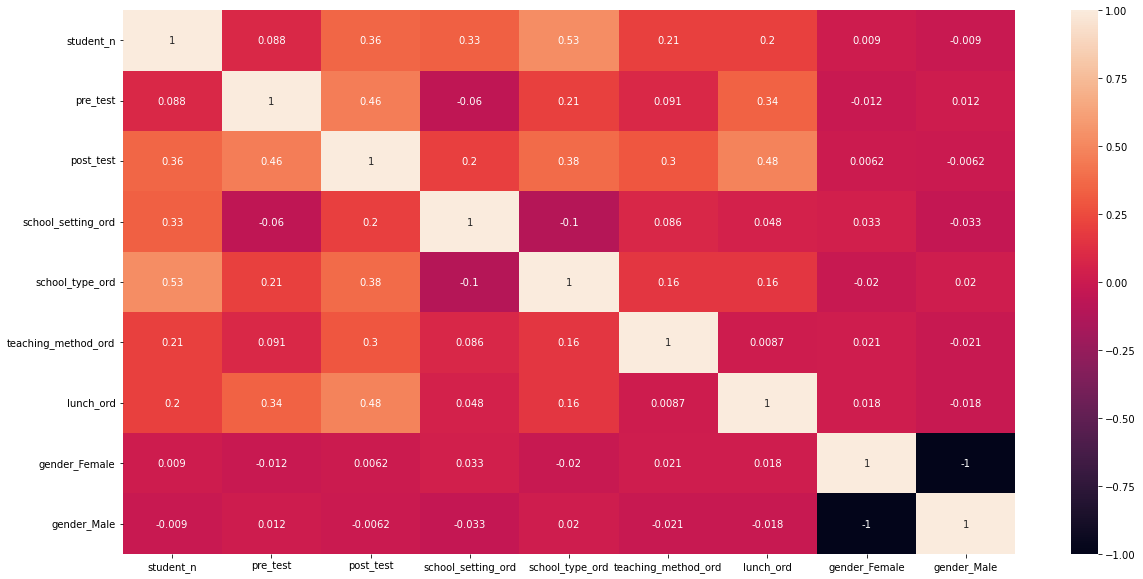

In [35]:
fig,ax = plt.subplots(figsize=[20,10])

corr = train_eda.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

Feature yang terpilih berdasarkan corr heatmap adalah studend_n, pre_test, school_setting_ord, school_type_ord, teaching_method_ord dan lunch


Kategorikal:
1. Ordinal encoding dilakukan untuk kolom school_setting, school_type, teaching_method dan lunch:
- school setting, lokasi sekolah: urban (0), suburban (1) dan rural (2)
- school type, public(sekolah negeri) = 1 dan non-public(sekolah swasta) = 0
- teaching_method, standard (mengikuti kurikulum yang ditetapkan pemerintah) = 1 dan experimental (belum mengikuti kurikulum yang ditetapkan pemerintah) = 0
- lunch, 'Does not qualify' = 0, 'Qualifies for reduced/free lunch' = 1
2. OHE dikulakan untuk kolom gender dikarenakan tidak ada tinkatan untuk kedua kategori


### PREPROCESS

#### Pipeline

In [36]:
cat_1_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[['Rural','Suburban','Urban'], ['Non-public','Public'], ['Experimental','Standard'], ['Does not qualify', 'Qualifies for reduced/free lunch']]))
    ])

cat_1_tr = cat_1_pipeline.fit_transform(X_train[['school_setting','school_type','teaching_method','lunch']])
cat_1_tr

array([[0., 1., 1., 0.],
       [2., 1., 1., 0.],
       [1., 1., 0., 0.],
       ...,
       [1., 0., 1., 0.],
       [2., 1., 1., 0.],
       [1., 0., 0., 1.]])

In [37]:
cat_2_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False)) #odor & fat
    ])

cat_2_tr = cat_2_pipeline.fit_transform(X_train[['gender']])
cat_2_tr

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [38]:
full_pipeline = ColumnTransformer([
        ("cat_ord", cat_1_pipeline, ['school_setting','school_type','teaching_method','lunch']),
        ("cat_ohe", cat_2_pipeline, ['gender']),
    ])

train_tr = full_pipeline.fit_transform(X_train)
train_tr

array([[0., 1., 1., 0., 1., 0.],
       [2., 1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0., 1.],
       ...,
       [1., 0., 1., 0., 0., 1.],
       [2., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1.]])

In [39]:
train_manual = np.array(train_eda[['school_setting_ord','school_type_ord','teaching_method_ord','lunch_ord','gender_Female','gender_Male']])

np.allclose(train_tr, train_manual)

True

In [40]:
test_tr = full_pipeline.transform(X_test)
test_tr

array([[1., 0., 0., 1., 1., 0.],
       [1., 1., 1., 1., 0., 1.],
       [2., 1., 1., 1., 1., 0.],
       ...,
       [1., 1., 0., 1., 0., 1.],
       [2., 1., 1., 1., 1., 0.],
       [2., 1., 0., 0., 1., 0.]])

In [41]:
full_pipeline

ColumnTransformer(transformers=[('cat_ord',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OrdinalEncoder(categories=[['Rural',
                                                                              'Suburban',
                                                                              'Urban'],
                                                                             ['Non-public',
                                                                              'Public'],
                                                                             ['Experimental',
                                                                              'Standard'],
                                                                             ['Does '
                                                                              'not '
                                                                              'qualify',
                                                                              'Qualifies '
                                                                              'for '
                                                                              'reduced/free '
                                                                              'lunch']]))]),
                                 ['school_setting', 'school_type',
                                  'teaching_method', 'lunch']),
                                ('cat_ohe',
                                 Pipeline(steps=[('ohe_enc',
                                                  OneHotEncoder(sparse=False))]),
                                 ['gender'])])

Preprocessing Data:
- pembuatan pipeline untuk ordinal encoding, OHE encoding dan pipeline keseluruhan
- pengecekan kesesuaian hasil dari manual process dan pipeline process
- penggunaan pipeline untuk data testing

### MODEL BUILDING

Adapun model yang digunakan adalah sebagai berikut:
1. Desicion Tree
2. Random Forest
3. KNN
4. Adaboost Classifier

Statement : 
- `post_test`  : (1=poor graded, 0=good grade)
- Mencari model terbaik dalam memprediksi kategori 1 yang mana kategori tersebut yang dijadikan urgensi dalam pemodelan ini

In [42]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
adb = AdaBoostClassifier()

### MODEL EVALUATION

#### Desicion Tree

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       717
           1       0.89      0.82      0.85       867

    accuracy                           0.85      1584
   macro avg       0.85      0.85      0.85      1584
weighted avg       0.85      0.85      0.85      1584

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       239
           1       0.91      0.84      0.88       290

    accuracy                           0.87       529
   macro avg       0.87      0.87      0.87       529
weighted avg       0.87      0.87      0.87       529

Confusion Matrix      : 


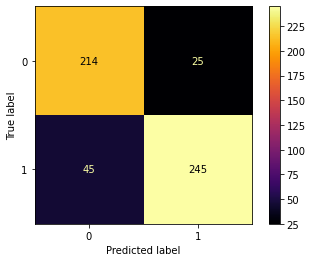

In [43]:
dtc.fit(train_tr, y_train)

dtc_train = dtc.predict(train_tr)
dtc_test = dtc.predict(test_tr)

print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc, test_tr, y_test, cmap='inferno'))

Decision Tree:
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model best fit, yang mana dapat dilihat recall untuk data train sebesar 0,82 dan data test sebesar 0,84
- Dapat dilihat pula pada confusion matriks yang menunjukan model dapat memprediksi 245 data dengan benar dari 290 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)

#### Random Forest

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       717
           1       0.89      0.82      0.85       867

    accuracy                           0.85      1584
   macro avg       0.85      0.85      0.85      1584
weighted avg       0.85      0.85      0.85      1584

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       239
           1       0.91      0.84      0.88       290

    accuracy                           0.87       529
   macro avg       0.87      0.87      0.87       529
weighted avg       0.87      0.87      0.87       529

Confusion Matrix      : 


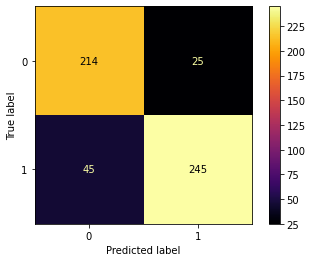

In [44]:
rfc.fit(train_tr, y_train)

rfc_train = rfc.predict(train_tr)
rfc_test = rfc.predict(test_tr)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc, test_tr, y_test, cmap='inferno'))

Random Forest:
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model best fit, yang mana dapat dilihat recall untuk data train sebesar 0,82 dan data test sebesar 0,84
- Dapat dilihat pula pada confusion matriks yang menunjukan model dapat memprediksi 245 data dengan benar dari 290 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)
- hasil yang ditampilkan sama dengan model decision tree

#### KNN

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       717
           1       0.86      0.85      0.85       867

    accuracy                           0.84      1584
   macro avg       0.84      0.84      0.84      1584
weighted avg       0.84      0.84      0.84      1584

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       239
           1       0.89      0.87      0.88       290

    accuracy                           0.87       529
   macro avg       0.87      0.87      0.87       529
weighted avg       0.87      0.87      0.87       529

Confusion Matrix      : 


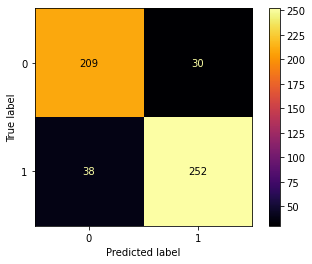

In [45]:
knn.fit(train_tr, y_train)

knn_train = knn.predict(train_tr)
knn_test = knn.predict(test_tr)

print(classification_report(y_train, knn_train))
print(classification_report(y_test, knn_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, test_tr, y_test, cmap='inferno'))

KKN:
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model best fit, yang mana dapat dilihat recall untuk data train sebesar 0,85 dan data test sebesar 0,87
- Dapat dilihat pula pada confusion matriks yang menunjukan model dapat memprediksi 252 data dengan benar dari 290 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)

#### Adaboost Classifier

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       717
           1       0.83      0.87      0.85       867

    accuracy                           0.83      1584
   macro avg       0.83      0.82      0.83      1584
weighted avg       0.83      0.83      0.83      1584

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       239
           1       0.86      0.89      0.87       290

    accuracy                           0.86       529
   macro avg       0.86      0.86      0.86       529
weighted avg       0.86      0.86      0.86       529

Confusion Matrix      : 


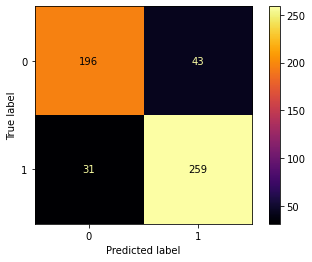

In [46]:
adb.fit(train_tr, y_train)

adb_train = adb.predict(train_tr)
adb_test = adb.predict(test_tr)

print(classification_report(y_train, adb_train))
print(classification_report(y_test, adb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(adb, test_tr, y_test, cmap='inferno'))

KKN:
- Dikarenakan data yang imbalance maka nilai akurasi tidak dapat dijadikan rujukan dalam melihat performa model
- Metric evaluation berfokus pada nilai recall untuk kategori 1, yang mana nilai tersebut menunjukan nilai ketepatan model dalam memprediksi target
- Nilai menunjukan bahwa model best fit, yang mana dapat dilihat recall untuk data train sebesar 0,87 dan data test sebesar 0,89
- Dapat dilihat pula pada confusion matriks yang menunjukan model dapat memprediksi 259 data dengan benar dari 290 data (recall menunjukan ketepatan prediksi model dalam bentuk desimal)

Hasil Evaluation Model:
- Decision tree dan Random forest menunjukan performa model yang sama
- Dari semua model, model KNN menunjukan performa terbaik dibandingkan model lainnya, namun performa model masih harus diujicobakan menggunakan metode cross valuation

### CROSS VALIDATION

#### Decision Tree

In [47]:
cv_dtc = cross_val_score(dtc,train_tr, y_train, cv=5, scoring='accuracy')

print('DecissionTree')
print('accuracy Score - All - Cross Validation  : ', cv_dtc)
print('accuracy Score - Mean - Cross Validation : ', cv_dtc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_dtc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_dtc.mean()-cv_dtc.std()) , '-', (cv_dtc.mean()+cv_dtc.std()))

DecissionTree
accuracy Score - All - Cross Validation  :  [0.83280757 0.84858044 0.83280757 0.82649842 0.83544304]
accuracy Score - Mean - Cross Validation :  0.8352274088567665
accuracy Score - Std - Cross Validation  :  0.0072973476038319255
accuracy Score - Range of Test-Set       :  0.8279300612529346 - 0.8425247564605984


#### Random Forest

In [48]:
cv_rfc = cross_val_score(rfc,train_tr, y_train, cv=5, scoring='accuracy')

print('RandomForest')
print('accuracy Score - All - Cross Validation  : ', cv_rfc)
print('accuracy Score - Mean - Cross Validation : ', cv_rfc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_rfc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_rfc.mean()-cv_rfc.std()) , '-', (cv_rfc.mean()+cv_rfc.std()))

RandomForest
accuracy Score - All - Cross Validation  :  [0.82649842 0.84858044 0.83280757 0.82334385 0.83227848]
accuracy Score - Mean - Cross Validation :  0.832701752984866
accuracy Score - Std - Cross Validation  :  0.008699135489620003
accuracy Score - Range of Test-Set       :  0.8240026174952461 - 0.841400888474486


#### KNN

In [49]:
cv_knn = cross_val_score(knn,train_tr, y_train, cv=5, scoring='accuracy')

print('KNN')
print('accuracy Score - All - Cross Validation  : ', cv_knn)
print('accuracy Score - Mean - Cross Validation : ', cv_knn.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_knn.std())
print('accuracy Score - Range of Test-Set       : ', (cv_knn.mean()-cv_knn.std()) , '-', (cv_knn.mean()+cv_knn.std()))

KNN
accuracy Score - All - Cross Validation  :  [0.80757098 0.84542587 0.86119874 0.829653   0.8164557 ]
accuracy Score - Mean - Cross Validation :  0.8320608553288343
accuracy Score - Std - Cross Validation  :  0.01937375872908455
accuracy Score - Range of Test-Set       :  0.8126870965997498 - 0.8514346140579189


#### Adaboost Classifier

In [50]:
cv_adb = cross_val_score(adb,train_tr, y_train, cv=5, scoring='accuracy')

print('AdaBoostClassifier')
print('accuracy Score - All - Cross Validation  : ', cv_adb)
print('accuracy Score - Mean - Cross Validation : ', cv_adb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_adb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_adb.mean()-cv_adb.std()) , '-', (cv_adb.mean()+cv_adb.std()))

AdaBoostClassifier
accuracy Score - All - Cross Validation  :  [0.83596215 0.86119874 0.829653   0.80757098 0.80379747]
accuracy Score - Mean - Cross Validation :  0.827636465279719
accuracy Score - Std - Cross Validation  :  0.020836175576394236
accuracy Score - Range of Test-Set       :  0.8068002897033247 - 0.8484726408561133


#### Hasil Cross Valuation

In [51]:
crossval = [cv_dtc,cv_rfc,cv_knn,cv_adb]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Decision Tree', 'Random Forest', 'KNN', 'AdaBoost']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,2)
bestmodel['Std']=np.round(std,2)
bestmodel.rename(columns={0:'Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Model,Mean,Std
0,Decision Tree,0.84,0.01
1,Random Forest,0.83,0.01
2,KNN,0.83,0.02
3,AdaBoost,0.83,0.02


Cross Valuation dilakukan pada semua model dengan tujuan untuk melihat konsistensi model dalam mengolah dan memprediksi data. Hasil digunakan untuk menentukan model terbaik yang selanjutnya dilakukan perlakuan hyperparameter tuning. Pemilihan model dilihat dari nilai mean terbesar dan nilai standardeviasi terkecil. Hasil adalah sebagai berikut:
- Standar deviasi tiap-tiap model menunjukan nilai yang rendah, yang mana selanjutnya dapat dilihat nilai mean pada tiap-tiap model
- Model Decision tree menunjukan performa terbaik dibandingkan model lainnya. selanjutnya model decision tree akan dilakukan model improvement

### Model Improvement

#### HYPER-PARAMETER TUNNING

In [52]:
params = {
    'max_depth': [2, 3, 5, 7, 10, 15],
    'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35],
    'criterion': ["gini", "entropy"]
}

In [53]:
grid_search = GridSearchCV(dtc, param_grid=params, cv=3,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(train_tr, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 10, 15],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35]},
             return_train_score=True, scoring='recall')

In [54]:
print('best params:', grid_search.best_params_)
print('best score:', grid_search.best_score_)

best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 35}
best score: 0.839677047289504


              precision    recall  f1-score   support

           0       0.81      0.84      0.82       717
           1       0.86      0.84      0.85       867

    accuracy                           0.84      1584
   macro avg       0.84      0.84      0.84      1584
weighted avg       0.84      0.84      0.84      1584

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       239
           1       0.86      0.86      0.86       290

    accuracy                           0.85       529
   macro avg       0.85      0.85      0.85       529
weighted avg       0.85      0.85      0.85       529

Confusion Matrix      : 


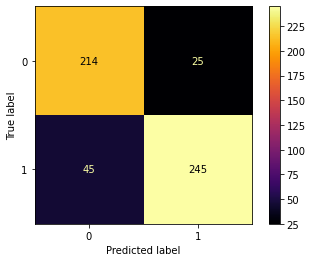

In [55]:
model = grid_search.best_estimator_

model.fit(train_tr, y_train)

model_train = model.predict(train_tr)
model_test = model.predict(test_tr)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc, test_tr, y_test, cmap='inferno'))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       717
           1       0.89      0.82      0.85       867

    accuracy                           0.85      1584
   macro avg       0.85      0.85      0.85      1584
weighted avg       0.85      0.85      0.85      1584

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       239
           1       0.91      0.84      0.88       290

    accuracy                           0.87       529
   macro avg       0.87      0.87      0.87       529
weighted avg       0.87      0.87      0.87       529

Confusion Matrix      : 


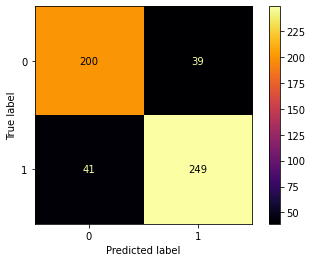

In [56]:
print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model, test_tr, y_test, cmap='inferno'))

Hasil Hyper_parameter Tuning:
- dari evaluation matric menunjukan tuning pada decision tree sedikit menaikan nilai recall 
- namun confusion metric tidak menunjukan adanya perbedaan antara parameter default dan parameter yang dituning

#### Balancing Data

Under Sampling

In [57]:
df_eda['post_test'].value_counts()

1    867
0    717
Name: post_test, dtype: int64

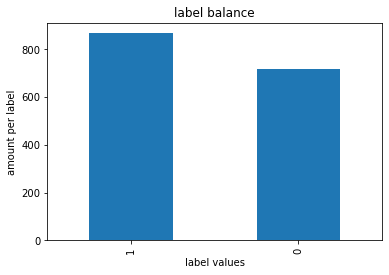

In [58]:
X_train_im, y_train_im = make_imbalance(X_train,y_train,sampling_strategy={0: 717, 1: 717},random_state=42)
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

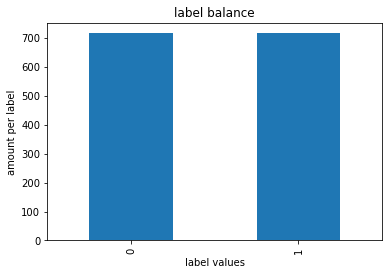

In [59]:
y_train_im.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [60]:
train_tr1 = full_pipeline.transform(X_train_im)
train_tr1

array([[0., 1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0., 1.],
       [1., 1., 0., 1., 1., 0.],
       ...,
       [0., 0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0.],
       [1., 1., 1., 0., 1., 0.]])

MODEL DECISION TREE

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       717
           1       0.90      0.79      0.84       717

    accuracy                           0.85      1434
   macro avg       0.86      0.85      0.85      1434
weighted avg       0.86      0.85      0.85      1434

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       239
           1       0.93      0.82      0.87       290

    accuracy                           0.87       529
   macro avg       0.87      0.87      0.87       529
weighted avg       0.87      0.87      0.87       529

Confusion Matrix      : 


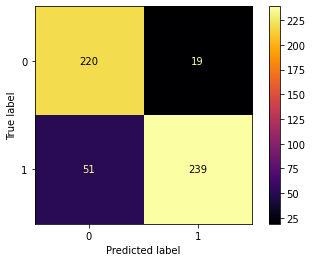

In [61]:
dtc.fit(train_tr1, y_train_im)

dtc_train1 = dtc.predict(train_tr1)
dtc_test = dtc.predict(test_tr)

print(classification_report(y_train_im, dtc_train1))
print(classification_report(y_test, dtc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc, test_tr, y_test, cmap='inferno'))

Balancing Data:
- balancing data menggunakan under sampling, dengan menyamakan jumlah data kategori 0 dengan kategori 1
- hasil performa model tidak lebih baik dari data sebelum disamakan jumlah datanya. Untuk prediksi pada kategori 1 mununjukan model tidak lebih baik namun perlakuan balancing data memperbaiki model dalam memprediksi kategori 0 

In [62]:
full_pipeline

ColumnTransformer(transformers=[('cat_ord',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OrdinalEncoder(categories=[['Rural',
                                                                              'Suburban',
                                                                              'Urban'],
                                                                             ['Non-public',
                                                                              'Public'],
                                                                             ['Experimental',
                                                                              'Standard'],
                                                                             ['Does '
                                                                              'not '
                                                                              'qualify',
                                                                              'Qualifies '
                                                                              'for '
                                                                              'reduced/free '
                                                                              'lunch']]))]),
                                 ['school_setting', 'school_type',
                                  'teaching_method', 'lunch']),
                                ('cat_ohe',
                                 Pipeline(steps=[('ohe_enc',
                                                  OneHotEncoder(sparse=False))]),
                                 ['gender'])])

#### Combine pipeline: preprocess and model

In [64]:
all_process = Pipeline([
            ('preprocess', full_pipeline),
            ('classification', model)
            ])

all_process.fit(X_train, y_train)
hasil_train = all_process.predict(X_train)
hasil_test = all_process.predict(X_test)

print(classification_report(y_train, hasil_train))
print(classification_report(y_test, hasil_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       717
           1       0.86      0.84      0.85       867

    accuracy                           0.84      1584
   macro avg       0.84      0.84      0.84      1584
weighted avg       0.84      0.84      0.84      1584

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       239
           1       0.86      0.86      0.86       290

    accuracy                           0.85       529
   macro avg       0.85      0.85      0.85       529
weighted avg       0.85      0.85      0.85       529



In [65]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['Rural',
                                                                                               'Suburban',
                                                                                               'Urban'],
                                                                                              ['Non-public',
                                                                                               'Public'],
                                                                                              ['Experimental',
                                                                                               'Standard'],
                                                                                              ['Does '
                                                                                               'not '
                                                                                               'qualify',
                                                                                               'Qualifies '
                                                                                               'for '
                                                                                               'reduced/free '
                                                                                               'lunch']]))]),
                                                  ['school_setting',
                                                   'school_type',
                                                   'teaching_method',
                                                   'lunch']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['gender'])])),
                ('classification',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=35,
                                        random_state=42))])

#### MODEL INFERENCE

In [67]:
inf = inference.reset_index(drop=True)
inf

,school_setting,school_type,teaching_method,gender,lunch,student_n,pre_test,post_test
0,Rural,Public,Standard,Female,Qualifies for reduced/free lunch,1,1,1
1,Urban,Public,Standard,Male,Does not qualify,1,1,1
2,Urban,Non-public,Experimental,Male,Does not qualify,1,0,0
3,Suburban,Public,Experimental,Male,Does not qualify,0,1,1
4,Rural,Public,Standard,Female,Does not qualify,0,1,1
5,Rural,Public,Standard,Female,Does not qualify,1,1,1
6,Rural,Public,Standard,Male,Qualifies for reduced/free lunch,1,1,1
7,Suburban,Public,Standard,Female,Qualifies for reduced/free lunch,1,1,1
8,Urban,Public,Standard,Female,Does not qualify,1,1,1
9,Rural,Public,Standard,Female,Does not qualify,0,1,1


In [68]:
X_inf = inf.drop('post_test',axis=1).copy()
y_inf = inf['post_test']

In [69]:
all_process.predict(X_inf)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [70]:
inf_y = all_process.predict(X_inf)

In [71]:
df_inf_y = pd.DataFrame(inf_y, columns=['Prediksi_grade'])

In [72]:
pd.concat([inf,df_inf_y], axis=1)

,school_setting,school_type,teaching_method,gender,lunch,student_n,pre_test,post_test,Prediksi_grade
0,Rural,Public,Standard,Female,Qualifies for reduced/free lunch,1,1,1,1
1,Urban,Public,Standard,Male,Does not qualify,1,1,1,1
2,Urban,Non-public,Experimental,Male,Does not qualify,1,0,0,0
3,Suburban,Public,Experimental,Male,Does not qualify,0,1,1,0
4,Rural,Public,Standard,Female,Does not qualify,0,1,1,1
5,Rural,Public,Standard,Female,Does not qualify,1,1,1,1
6,Rural,Public,Standard,Male,Qualifies for reduced/free lunch,1,1,1,1
7,Suburban,Public,Standard,Female,Qualifies for reduced/free lunch,1,1,1,1
8,Urban,Public,Standard,Female,Does not qualify,1,1,1,1
9,Rural,Public,Standard,Female,Does not qualify,0,1,1,1


### CONCLUSION

- Data pendidikan yang digunakan berisi informasi tipe sekolah, lokasi sekolah, tipe pengajaran, jumlah siswa dalam kelas, kualitan makan siang dan nilai siswa
- status siswa diubah kedalam dua kategori yang mana siswa dengan nilai dibawah 70 masuk kedalam kategori poor grade dan siswa dengan nilai diatas 70 masuk kedalam kategori good grade
- penelitian berfokus pada kategori poor grade mengingat untuk memenuhi tujuan awal untuk memprediksi siswa dibawah nilai yang ditentukan
- Cross valuation yang dilakukan kepada semua model menunjukan model Decision tree mempunyai performa terbaik dibandingkan model lainnya
- Hyper-parameter tuning yang dilakukan sidikit memperbaiki performa model decision tree
- Balancing pada data tidak memberikan perbaikan pada performa model

### Model Inference - Deploy

In [73]:
import pickle

pickle.dump(all_process, open("M2P1_model.pkl", "wb"))

In [76]:
model_app = pickle.load(open("M2P1_model.pkl", "rb"))

In [77]:
Category = model_app.predict(inf).tolist()[0]
Category

1

In [78]:
if Category == 1:
    print("Qualified to Join The Program")
else:
    print("Does't Qualified to Join The Program")

Qualified to Join The Program
